#IMPORT DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/final_project.csv')

In [ ]:
df.head()

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,presentase_diskon,price,product_id,quantity_sold,rating,shop_name,subcategory,title,url
0,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,954,0,Kota Bandung,0,55000,284008675,0,5,Openshop,Blouse,Baju Atasan Blouse Wanita Baju Muslim Blus Mus...,https://www.tokopedia.com/openols/baju-atasan-...
1,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,761,0,Kota Bandung,0,65000,283976385,0,5,Openshop,Blouse,Baju Atasan Wanita Magali Tunik Blouse Baju Mu...,https://www.tokopedia.com/openols/baju-atasan-...
2,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,439,0,Jakarta,0,59000,316717554,0,5,joZFashion,Piyama,Piyama Black Cat Daster Baju Tidur Wanita Dewasa,https://www.tokopedia.com/wjozfashion/piyama-b...
3,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,909,0,Kota Bandung,0,59000,270887764,0,5,Openshop,Blouse,Tunik Atasan Wanita Blouse Baju Muslim Blus Mu...,https://www.tokopedia.com/openols/tunik-atasan...
4,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,614,0,Kota Bandung,0,55000,284010469,0,5,Openshop,Blouse,Atasan Wanita Ellena Peplum Blouse Tunik Baju ...,https://www.tokopedia.com/openols/atasan-wanit...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           4503 non-null   object
 1   city               4503 non-null   object
 2   gold_merchant      4503 non-null   bool  
 3   image_url          4503 non-null   object
 4   jumlah_review      4503 non-null   int64 
 5   jumlah_view        4503 non-null   object
 6   location           4503 non-null   object
 7   presentase_diskon  4503 non-null   int64 
 8   price              4503 non-null   int64 
 9   product_id         4503 non-null   int64 
 10  quantity_sold      4503 non-null   int64 
 11  rating             4503 non-null   int64 
 12  shop_name          4503 non-null   object
 13  subcategory        4503 non-null   object
 14  title              4503 non-null   object
 15  url                4503 non-null   object
dtypes: bool(1), int64(6), object(9)
memory usa

In [ ]:
df.isnull().sum()

category             0
city                 0
gold_merchant        0
image_url            0
jumlah_review        0
jumlah_view          0
location             0
presentase_diskon    0
price                0
product_id           0
quantity_sold        0
rating               0
shop_name            0
subcategory          0
title                0
url                  0
dtype: int64

# Feature Engineering

True = 1
False = 0

In [ ]:
df["gold_merchant"] = df["gold_merchant"].astype("int")

In [ ]:
#Mengganti jumlah view yang ada koma nya menjadi tidak ada
df['jumlah_view'] = df['jumlah_view'].str.replace(',', '')

In [ ]:
df["jumlah_view"] = df["jumlah_view"].astype("int")

In [ ]:
print("Gold Merchant:\n",df["gold_merchant"].value_counts())

Gold Merchant:
 1    2260
0    2243
Name: gold_merchant, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           4503 non-null   object
 1   city               4503 non-null   object
 2   gold_merchant      4503 non-null   int64 
 3   image_url          4503 non-null   object
 4   jumlah_review      4503 non-null   int64 
 5   jumlah_view        4503 non-null   int64 
 6   location           4503 non-null   object
 7   presentase_diskon  4503 non-null   int64 
 8   price              4503 non-null   int64 
 9   product_id         4503 non-null   int64 
 10  quantity_sold      4503 non-null   int64 
 11  rating             4503 non-null   int64 
 12  shop_name          4503 non-null   object
 13  subcategory        4503 non-null   object
 14  title              4503 non-null   object
 15  url                4503 non-null   object
dtypes: int64(8), object(8)
memory usage: 563.0

#Insight Data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Jumlah yang terjual')

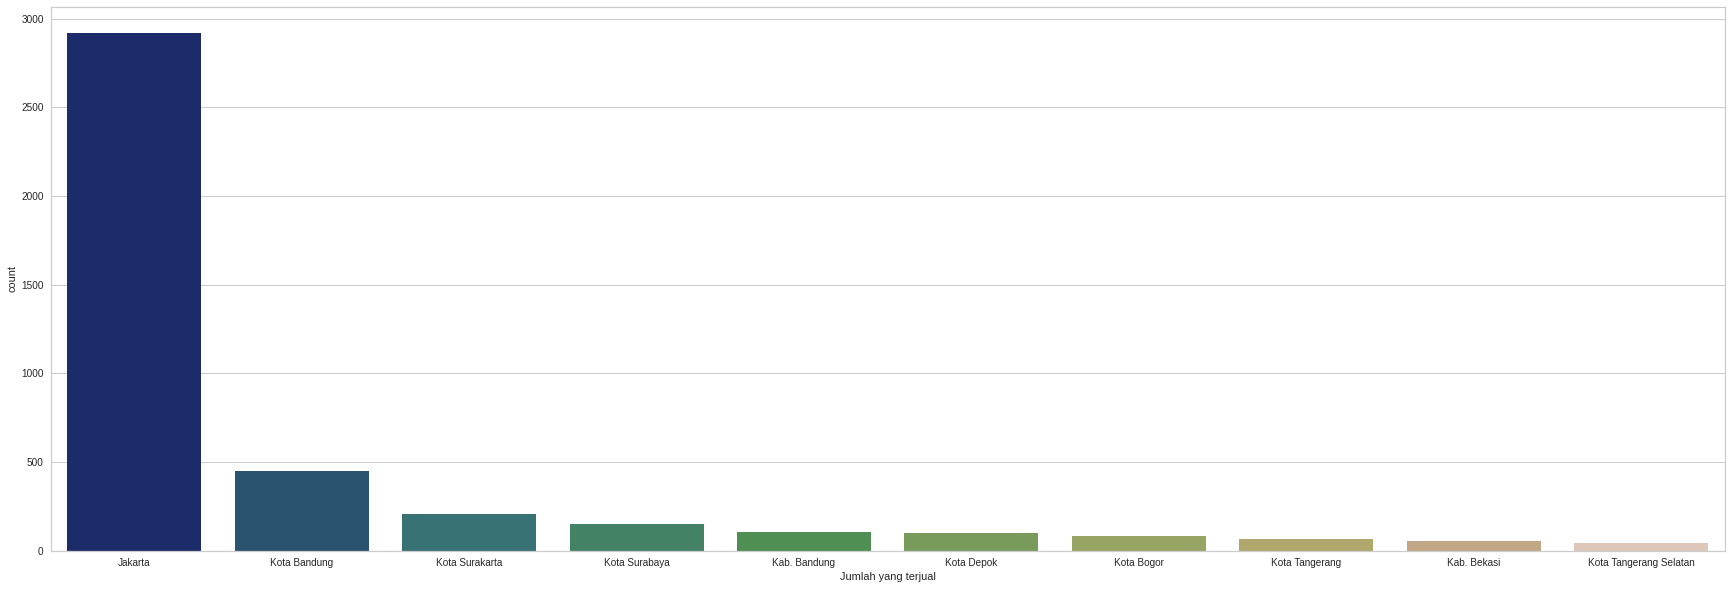

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot('city', data=df, palette='gist_earth', order=df['city'].value_counts()[:10].sort_values(ascending=False).index)
plt.xlabel('Jumlah yang terjual')

In [ ]:
df['city'].value_counts()[:5]

Jakarta           2919
Kota Bandung       452
Kota Surakarta     208
Kota Surabaya      150
Kab. Bandung       105
Name: city, dtype: int64

Berdasarkan grafik di atas, bahwa Jakarta yang mempunyai pelanggan Fashian Wanita paling banyak yaitu 2919 dan disusul oleh Kota Bandung yaitu 452.

In [ ]:
df['rating'].value_counts()

5    3970
4     530
0       2
3       1
Name: rating, dtype: int64

<Figure size 1080x576 with 0 Axes>

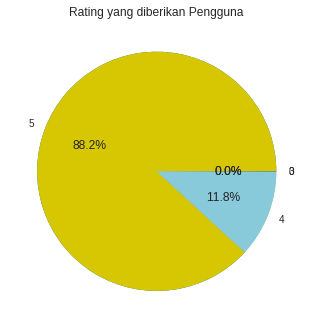

In [ ]:
plt.figure(figsize=(15,8))

source = df['rating'].value_counts()
labels = ['5', '4','0','3']


fig1, ax1 = plt.subplots()
ax1.pie(source,labels=labels, autopct='%1.1f%%', startangle=0)

plt.title('Rating yang diberikan Pengguna')
plt.pie(source)
plt.show()

Berdasarkan chart di atas bahwa Bukapedia memiliki Rating yang bagus yaitu memiliki Rating 5 sebanyak 3970 pelanggan dan yang memberikan rating 0 hanya 2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Jumlah yang terjual')

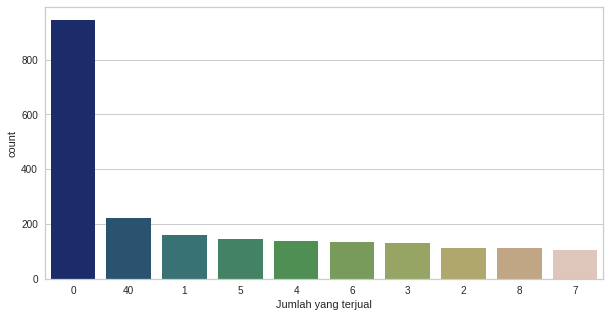

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot('quantity_sold', data=df, palette='gist_earth', order=df['quantity_sold'].value_counts()[:10].sort_values(ascending=False).index)
plt.xlabel('Jumlah yang terjual')

In [ ]:
quantity_sold = df['quantity_sold'].value_counts()[:10]
quantity_sold

0     945
40    221
1     160
5     146
4     138
6     133
3     129
2     114
8     113
7     104
Name: quantity_sold, dtype: int64

Berdasarkan grafik di atas bahwa pelanggan Bukapedia banyak yang tidak membeli barang, melainkan hanya melihat atau klik saja. Jumlah yang paling banyak dibeli yaitu 40 produk sebanyak 221 pelanggan.

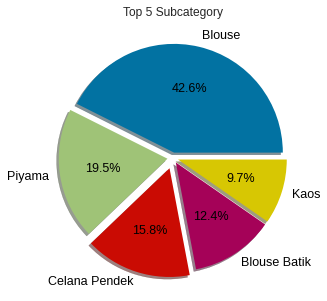

In [ ]:
plt.figure(figsize=(7,5))
plt.pie(df['subcategory'].value_counts()[0:5],labels = df['subcategory'].unique()[0:5],autopct='%1.1f%%',explode = (0.05,0.05, 0.1,0.05,0.05),shadow=True,textprops={'color':'black','fontsize':12.5})
plt.title('Top 5 Subcategory', loc='center')
plt.show()

In [ ]:
subcategory = df['subcategory'].value_counts()[:10]
subcategory

Blouse        1240
Piyama         569
Kaos           461
Maxi Dress     360
Kemeja         281
Midi Dress     210
Daster         181
Sweater        175
Setelan        174
Lingerie       152
Name: subcategory, dtype: int64

Berdasarkan chart di atas, bahwa Blouse yang paling banyak diminati oleh pelanggan Bukapedia yaitu 42.6% atau sebanyak 1240 dan disusul oleh Piyama sebanyak 569.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Jumlah yang terjual')

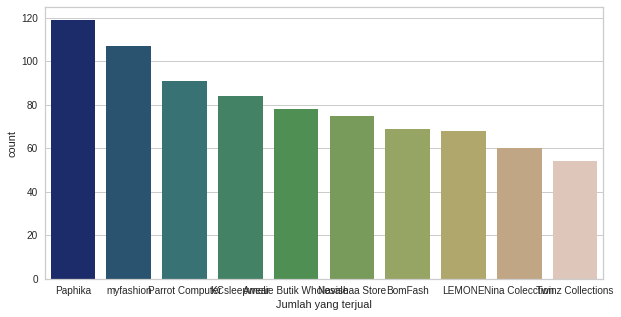

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot('shop_name', data=df, palette='gist_earth', order=df['shop_name'].value_counts()[:10].sort_values(ascending=False).index)
plt.xlabel('Jumlah yang terjual')

In [ ]:
shop_name = df['shop_name'].value_counts()[:10]
shop_name

Paphika                   119
myfashion                 107
Parrot Computer            91
KCsleepwear                84
Amelie Butik Wholesale     78
Navishaa Store             75
BomFash                    69
LEMONE                     68
Nina Colecction            60
Twinz Collections          54
Name: shop_name, dtype: int64

Berdasarkan grafik di atas, bahwa terlihat pelanggan Bukapedia kebanyakan pada tertarik dengan toko Paphika yaitu sebanyak 119 dan disusul oleh toko myfashion sebanyak 107.

# Machine Learning

In [ ]:
X = df.drop(['gold_merchant'], axis=1)
y = df['gold_merchant']

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
categorical = ["category", "city", "image_url", "location", "shop_name", "subcategory","title","url","price"]

for i in categorical:
  X[i] = label_encoder.fit_transform(X[i])

X

,category,city,image_url,jumlah_review,jumlah_view,location,presentase_diskon,price,product_id,quantity_sold,rating,shop_name,subcategory,title,url
0,0,30,3611,954,0,30,0,198,284008675,0,5,474,5,560,2961
1,0,30,619,761,0,30,0,248,283976385,0,5,474,5,802,2971
2,0,0,4467,439,0,0,0,226,316717554,0,5,796,35,3240,4399
3,0,30,739,909,0,30,0,226,270887764,0,5,474,5,3703,2985
4,0,30,459,614,0,30,0,198,284010469,0,5,474,5,146,2951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,0,0,2020,33,0,0,0,488,366339754,99,5,627,44,2183,33
4499,0,0,1925,33,0,0,0,690,363772675,99,5,645,23,2621,4160
4500,0,0,2297,31,0,0,0,398,358247047,99,5,595,27,1383,3804
4501,0,51,1862,18,0,51,0,177,335503058,99,5,415,16,2270,2250


# Classification

In [ ]:
#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
#Cross Validation -> Untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
#Evaluation Model
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [ ]:
# Algoritma Modelling

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
            KNeighborsClassifier,
            GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
            XGBClassifier]

model_name = ['DecisionTreeClassifier',
             'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
             'SVC',
             'LinearSVC',
             'RandomForestClassifier',
             'GradientBoostingClassifier',
             'ExtraTreesClassifier',
             'XGBClassifier']
#Looping untuk di semua model Machine Learning

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y):

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")

        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))

        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")

        nfold += 1

    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [1.0], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.8623751387347391], 1 of KFold 5
DecisionTreeClassifier Recall: [0.8761061946902655], 1 of KFold 5
DecisionTreeClassifier Precission: [0.853448275862069], 1 of KFold 5
DecisionTreeClassifier AUC: [0.8623292666101662], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [1.0], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.8623751387347391], 2 of KFold 5
DecisionTreeClassifier Recall: [0.8761061946902655], 2 of KFold 5
DecisionTreeClassifier Precission: [0.853448275862069], 2 of KFold 5
DecisionTreeClassifier AUC: [0.8623

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

----------AFTER------------
LogisticRegression Acc Train: [0.4980566352026652, 0.4980566352026652, 0.4980566352026652, 0.4981959478212601, 0.4981959478212601], 5 of KFold 5
LogisticRegression Acc Test: [0.4983351831298557, 0.4983351831298557, 0.4983351831298557, 0.49777777777777776, 0.49777777777777776], 5 of KFold 5
LogisticRegression Recall: [0.0, 0.0, 0.0, 0.0, 0.0], 5 of KFold 5
LogisticRegression Precission: [0.0, 0.0, 0.0, 0.0, 0.0], 5 of KFold 5
LogisticRegression AUC: [0.5, 0.5, 0.5, 0.5, 0.5], 5 of KFold 5
---------------------------
----------FINAL------------
LogisticRegression Acc Train: 0.49811236025010314
LogisticRegression Acc Test: 0.4981122209890246
LogisticRegression Recall: 0.0
LogisticRegression Precission: 0.0
LogisticRegression AUC: 0.5
---------------------------
----------BEFORE------------
KNeighborsClassifier Acc Train: [], 1 of KFold 5
KNeighborsClassifier Acc Test: [], 1 of KFold 5
KNeighborsClassifier Recall: [], 1 of KFold 5
KNeighborsClassifier Precission

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------AFTER------------
LinearSVC Acc Train: [0.4983342587451416], 1 of KFold 5
LinearSVC Acc Test: [0.4983351831298557], 1 of KFold 5
LinearSVC Recall: [0.0], 1 of KFold 5
LinearSVC Precission: [0.0], 1 of KFold 5
LinearSVC AUC: [0.5], 1 of KFold 5
---------------------------
----------BEFORE------------
LinearSVC Acc Train: [0.4983342587451416], 2 of KFold 5
LinearSVC Acc Test: [0.4983351831298557], 2 of KFold 5
LinearSVC Recall: [0.0], 2 of KFold 5
LinearSVC Precission: [0.0], 2 of KFold 5
LinearSVC AUC: [0.5], 2 of KFold 5
---------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------AFTER------------
LinearSVC Acc Train: [0.4983342587451416, 0.4983342587451416], 2 of KFold 5
LinearSVC Acc Test: [0.4983351831298557, 0.4983351831298557], 2 of KFold 5
LinearSVC Recall: [0.0, 0.0], 2 of KFold 5
LinearSVC Precission: [0.0, 0.0], 2 of KFold 5
LinearSVC AUC: [0.5, 0.5], 2 of KFold 5
---------------------------
----------BEFORE------------
LinearSVC Acc Train: [0.4983342587451416, 0.4983342587451416], 3 of KFold 5
LinearSVC Acc Test: [0.4983351831298557, 0.4983351831298557], 3 of KFold 5
LinearSVC Recall: [0.0, 0.0], 3 of KFold 5
LinearSVC Precission: [0.0, 0.0], 3 of KFold 5
LinearSVC AUC: [0.5, 0.5], 3 of KFold 5
---------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


----------AFTER------------
LinearSVC Acc Train: [0.4983342587451416, 0.4983342587451416, 0.5019433647973348], 3 of KFold 5
LinearSVC Acc Test: [0.4983351831298557, 0.4983351831298557, 0.5016648168701443], 3 of KFold 5
LinearSVC Recall: [0.0, 0.0, 1.0], 3 of KFold 5
LinearSVC Precission: [0.0, 0.0, 0.5016648168701443], 3 of KFold 5
LinearSVC AUC: [0.5, 0.5, 0.5], 3 of KFold 5
---------------------------
----------BEFORE------------
LinearSVC Acc Train: [0.4983342587451416, 0.4983342587451416, 0.5019433647973348], 4 of KFold 5
LinearSVC Acc Test: [0.4983351831298557, 0.4983351831298557, 0.5016648168701443], 4 of KFold 5
LinearSVC Recall: [0.0, 0.0, 1.0], 4 of KFold 5
LinearSVC Precission: [0.0, 0.0, 0.5016648168701443], 4 of KFold 5
LinearSVC AUC: [0.5, 0.5, 0.5], 4 of KFold 5
---------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


----------AFTER------------
LinearSVC Acc Train: [0.4983342587451416, 0.4983342587451416, 0.5019433647973348, 0.49847349431029697], 4 of KFold 5
LinearSVC Acc Test: [0.4983351831298557, 0.4983351831298557, 0.5016648168701443, 0.49666666666666665], 4 of KFold 5
LinearSVC Recall: [0.0, 0.0, 1.0, 0.0], 4 of KFold 5
LinearSVC Precission: [0.0, 0.0, 0.5016648168701443, 0.0], 4 of KFold 5
LinearSVC AUC: [0.5, 0.5, 0.5, 0.49888392857142855], 4 of KFold 5
---------------------------
----------BEFORE------------
LinearSVC Acc Train: [0.4983342587451416, 0.4983342587451416, 0.5019433647973348, 0.49847349431029697], 5 of KFold 5
LinearSVC Acc Test: [0.4983351831298557, 0.4983351831298557, 0.5016648168701443, 0.49666666666666665], 5 of KFold 5
LinearSVC Recall: [0.0, 0.0, 1.0, 0.0], 5 of KFold 5
LinearSVC Precission: [0.0, 0.0, 0.5016648168701443, 0.0], 5 of KFold 5
LinearSVC AUC: [0.5, 0.5, 0.5, 0.49888392857142855], 5 of KFold 5
---------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


----------AFTER------------
LinearSVC Acc Train: [0.4983342587451416, 0.4983342587451416, 0.5019433647973348, 0.49847349431029697, 0.5018040521787399], 5 of KFold 5
LinearSVC Acc Test: [0.4983351831298557, 0.4983351831298557, 0.5016648168701443, 0.49666666666666665, 0.5022222222222222], 5 of KFold 5
LinearSVC Recall: [0.0, 0.0, 1.0, 0.0, 1.0], 5 of KFold 5
LinearSVC Precission: [0.0, 0.0, 0.5016648168701443, 0.0, 0.5022222222222222], 5 of KFold 5
LinearSVC AUC: [0.5, 0.5, 0.5, 0.49888392857142855, 0.5], 5 of KFold 5
---------------------------
----------FINAL------------
LinearSVC Acc Train: 0.49977788575533094
LinearSVC Acc Test: 0.4994448144037489
LinearSVC Recall: 0.4
LinearSVC Precission: 0.20077740781847328
LinearSVC AUC: 0.49977678571428574
---------------------------
----------BEFORE------------
RandomForestClassifier Acc Train: [], 1 of KFold 5
RandomForestClassifier Acc Test: [], 1 of KFold 5
RandomForestClassifier Recall: [], 1 of KFold 5
RandomForestClassifier Precission: []

In [ ]:
#Melihat Perbandingan setiap Model
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
8,ExtraTreesClassifier,1.000000,0.907398,0.884356,0.938938,0.907279,9.260229e-02
6,RandomForestClassifier,1.000000,0.906284,0.875358,0.948673,0.906121,9.371636e-02
0,DecisionTreeClassifier,1.000000,0.868311,0.862686,0.877434,0.868273,1.316892e-01
7,GradientBoostingClassifier,0.888185,0.853878,0.823103,0.903097,0.853688,3.430719e-02
9,XGBClassifier,0.879969,0.849430,0.817361,0.902212,0.849225,3.053914e-02
2,KNeighborsClassifier,0.792638,0.697754,0.686905,0.732743,0.697615,9.488380e-02
4,SVC,0.637519,0.636460,0.609561,0.767699,0.635959,1.059325e-03
3,GaussianNB,0.553519,0.557404,0.655774,0.253982,0.558545,3.885034e-03
5,LinearSVC,0.499778,0.499445,0.200777,0.400000,0.499777,3.330714e-04
1,LogisticRegression,0.498112,0.498112,0.000000,0.000000,0.500000,1.392611e-07


#Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns

import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
import warnings
import sys
np.random.seed(42)

In [ ]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical Variables in Dataset : ", object_cols)

Categorical Variables in Dataset :  ['category', 'city', 'image_url', 'location', 'shop_name', 'subcategory', 'title', 'url']


In [ ]:
LE = LabelEncoder()
for i in object_cols:
  df[i] = df[[i]].apply(LE.fit_transform)

In [ ]:
LE = LabelEncoder()
for i in object_cols:
  df[i] = df[[i]].apply(LE.fit_transform)

In [ ]:
ds = df.copy()
ds

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,presentase_diskon,price,product_id,quantity_sold,rating,shop_name,subcategory,title,url
0,0,30,1,3611,954,0,30,0,55000,284008675,0,5,474,5,560,2961
1,0,30,1,619,761,0,30,0,65000,283976385,0,5,474,5,802,2971
2,0,0,0,4467,439,0,0,0,59000,316717554,0,5,796,35,3240,4399
3,0,30,1,739,909,0,30,0,59000,270887764,0,5,474,5,3703,2985
4,0,30,1,459,614,0,30,0,55000,284010469,0,5,474,5,146,2951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,0,0,0,2020,33,0,0,0,131500,366339754,99,5,627,44,2183,33
4499,0,0,0,1925,33,0,0,0,239900,363772675,99,5,645,23,2621,4160
4500,0,0,0,2297,31,0,0,0,105000,358247047,99,5,595,27,1383,3804
4501,0,51,1,1862,18,0,51,0,50000,335503058,99,5,415,16,2270,2250


In [ ]:
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns = ds.columns)

In [ ]:
scaled_ds.head()

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,presentase_diskon,price,product_id,quantity_sold,rating,shop_name,subcategory,title,url
0,0.0,1.003135,0.996232,1.059496,12.935780,-0.180574,1.003135,0.0,-0.505555,0.021538,-0.274831,0.354621,0.143904,-1.242677,-1.268753,0.546194
1,0.0,1.003135,0.996232,-1.250209,10.252226,-0.180574,1.003135,0.0,-0.387452,0.021143,-0.274831,0.354621,0.143904,-1.242677,-1.073142,0.553887
2,0.0,-0.640210,-1.003782,1.720294,5.775002,-0.180574,-0.640210,0.0,-0.458314,0.421409,-0.274831,0.354621,1.440415,0.975052,0.897520,1.652430
3,0.0,1.003135,0.996232,-1.157573,12.310081,-0.180574,1.003135,0.0,-0.458314,-0.138867,-0.274831,0.354621,0.143904,-1.242677,1.271768,0.564657
4,0.0,1.003135,0.996232,-1.373722,8.208276,-0.180574,1.003135,0.0,-0.505555,0.021560,-0.274831,0.354621,0.143904,-1.242677,-1.603394,0.538501


In [ ]:
pca = PCA(n_components = 3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns = ["col1", "col2", "col3"])
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,4503.0,6.311728e-17,1.490439,-2.782423,-1.164187,-0.429134,1.060638,7.411225
col2,4503.0,3.392554e-17,1.310168,-4.122196,-0.940322,-0.149822,0.796845,15.000191
col3,4503.0,-4.102623e-17,1.253749,-4.759696,-0.900736,-0.037872,0.877430,10.293971


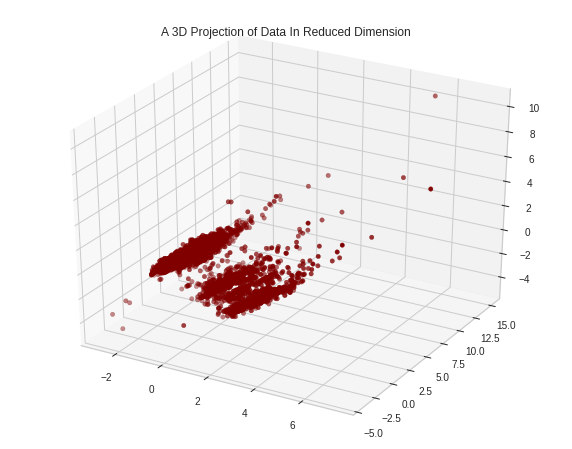

In [ ]:
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x, y, z, c = "maroon", marker = "o")
ax.set_title("A 3D Projection of Data In Reduced Dimension")
plt.show()

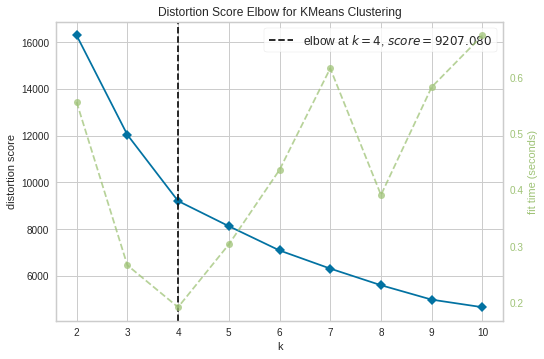

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
AC = AgglomerativeClustering(n_clusters = 4)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
df["Clusters"] = yhat_AC

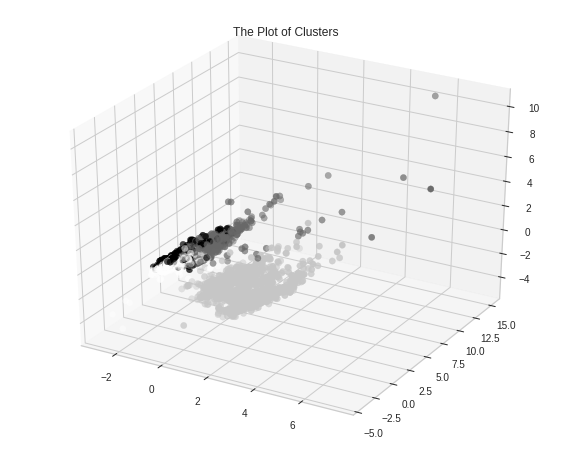

In [ ]:
fig = plt.figure(figsize = (10, 8))
ax = plt.subplot(111, projection = '3d', label = 'bla')
ax.scatter(x, y, z, s = 40, c = PCA_ds["Clusters"], marker = "o")
ax.set_title("The Plot of Clusters")
plt.show()

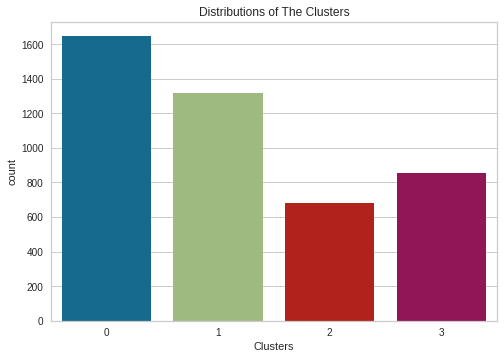

In [ ]:
pl = sns.countplot(x = df["Clusters"])
pl.set_title("Distributions of The Clusters")
plt.show()

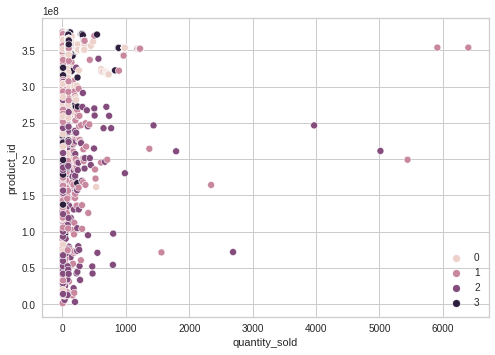

In [ ]:
pl = sns.scatterplot(data = df, x = df['quantity_sold'], y = df['product_id'], hue = df["Clusters"])
plt.legend()
plt.show()